# Dipole interaction force

## Imports and constants

In [284]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from math import *
u0 = pi*4.0e-7 # N/Am

## Load external functions

In [285]:
%run ./functions.py

## Material Parameters

In [286]:
D = 1.0/8;  # Inches?
t = 0.5; # Inches?
u0 = pi*4.0e-7 # N/Am
Br = 1.32e4 # Gauss

## Field generating dipole moment

In [287]:
# POSITION/DIRECTION PARAMETERS
# Position of dipole (r0) in meters
x0 = 0.0; y0 = 0.1; z0 = 0.0;
r0Vec = np.array([x0, y0, z0])
# Direction of dipole
# will be normalized
i = 0;j = 0;k = 1;
dirvec = np.array([i,j,k])
# Calculate dipole moment vector
V = volume(D,t)
m = dipMoment(Br, V)
mVec = dipMomentVec2(m, dirvec)

 ## Create a mesh of points and find field at them

In [303]:
x = np.arange(-0.5, 0.5, 0.1)
y = np.arange(-0.5, 0.5, 0.1)
z = np.arange(-0.5, 0.5, 0.1)
X,Y,Z = np.meshgrid(x,y,z)
Bx,By,Bz = dipfield2(mVec,r0Vec,X,Y,Z)
# Do the same for 2D slice
X2,Z2 = np.meshgrid(x,z)
Bx2,By2,Bz2 = dipfield2(mVec,r0Vec,X2,0.1,Z2)

## Plot first dipole field

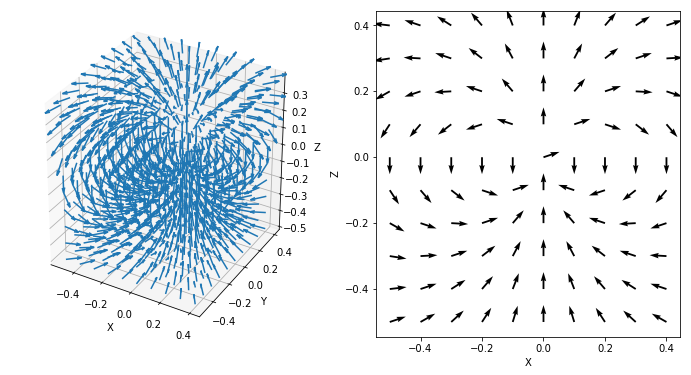

In [304]:
fig = plt.figure(figsize=(12, 6))
#ax = fig.gca(projection='3d')
ax = [fig.add_subplot(121, projection='3d'),
      fig.add_subplot(122)]
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_zlabel('Z')
ax[0].quiver(X, Y, Z, Bx, By, Bz, length=0.1, normalize=True)
# 2D slice 
ax[1].set_xlabel('X')
ax[1].set_ylabel('Z')
#Normalize arrows
Bx2n = Bx2/((Bx2**2+Bz2**2)**0.5)
Bz2n = Bz2/((Bx2**2+Bz2**2)**0.5)
## Plot in y = 0.1
ax[1].quiver(X2,Z2,Bx2n,Bz2n)
plt.show()

## Calculate scalar field

In [305]:
# Define the direction of the second dipole (same magnetic properties)
# Direction of dipole, will be normalized
i = 0;j = 0;k = -1;
dirvec2 = np.array([i,j,k])
# Calculate dipole moment vector
mVec2 = dipMomentVec2(m, dirvec2)
# Calculate the dot product 
mdotB = dotproduct(mVec2[0],mVec2[1],mVec2[2],Bx,By,Bz)
# Do the same for 2d slice
mdotB2 = dotproduct(mVec2[0],mVec2[1],mVec2[2],Bx2,By2,Bz2)

## Plot scalar field

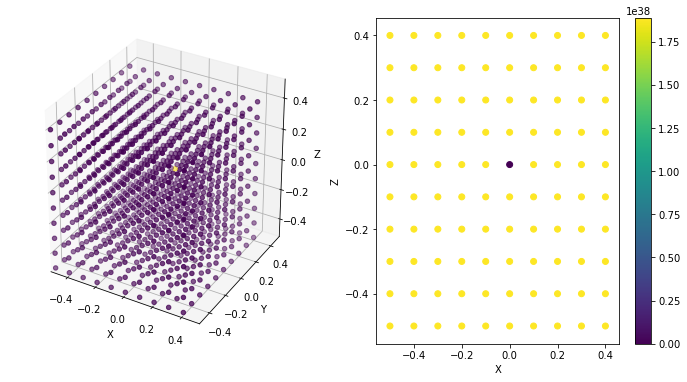

In [306]:
fig2 = plt.figure(figsize=(12, 6))
ax2 = [fig2.add_subplot(121, projection='3d'),
      fig2.add_subplot(122)]
ax2[0].set_xlim(-0.5, 0.5)
ax2[0].set_ylim(-0.5, 0.5)
ax2[0].set_zlim(-0.5, 0.5)
ax2[0].set_xlabel('X')
ax2[0].set_ylabel('Y')
ax2[0].set_zlabel('Z')
scat = ax2[0].scatter(X,Y,Z,c = mdotB)
fig2.colorbar(scat)
# 2D slice
ax2[1].set_xlabel('X')
ax2[1].set_ylabel('Z')
ax2[1].scatter(X2,Z2,c = mdotB2)
plt.show()

## How gradient works in a 3D array

In [307]:
k = np.array([[[1 ,2],[3,4]],[[5,6],[7,8]]])
d3,d2,d1 = np.gradient(k)
# d1 calculates difference of the 1st level arrays that is [[[->1,->2],[3,4]],[[5,6],[7,8]]]
display("d1",d1)
# d2 calculates difference of the 2nd level arrays that is [[[->1,2],[->3,4]],[[5,6],[7,8]]]
display("d2",d2)
# d3 calculates difference of the 3rd level arrays that is [[[->1,2],[3,4]],[[->5,6],[7,8]]]
display("d3",d3)

'd1'

array([[[ 1.,  1.],
        [ 1.,  1.]],

       [[ 1.,  1.],
        [ 1.,  1.]]])

'd2'

array([[[ 2.,  2.],
        [ 2.,  2.]],

       [[ 2.,  2.],
        [ 2.,  2.]]])

'd3'

array([[[ 4.,  4.],
        [ 4.,  4.]],

       [[ 4.,  4.],
        [ 4.,  4.]]])

## Calculate gradient of scalar field to find force
In the 3d case (X,Y,Z) meshgrid makes X vary in the 2nd level, Y vary on the 3rd level and Z on the 1st level.
Display X,Y and Z to check this


In the 2d case (X2,Z2) meshgrids makes X vary on the 1st level and Z vary on the 2nd level. Display X2 and Z2 to check this

In [308]:
# Calculate the gradient of mdotB by specifying spacing
fy,fx,fz = np.gradient(mdotB,0.1,0.1,0.1)
# Do the same for 2D slice
fz2,fx2 = np.gradient(mdotB2,0.1,0.1)

## Plot force vector field

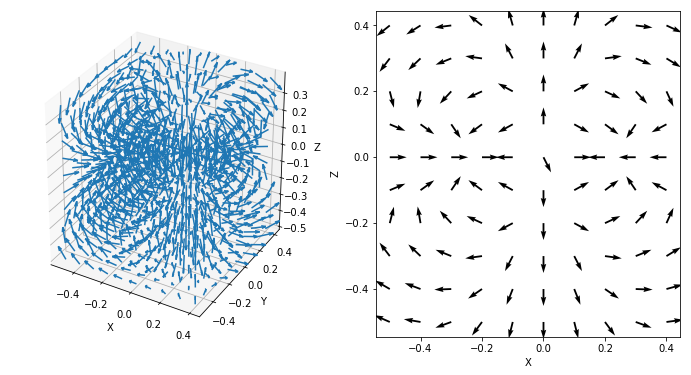

In [313]:
fig3 = plt.figure(figsize=(12, 6))
ax3 = [fig3.add_subplot(121, projection='3d'),
      fig3.add_subplot(122)]
ax3[0].set_xlabel('X')
ax3[0].set_ylabel('Y')
ax3[0].set_zlabel('Z')
ax3[0].quiver(X, Y, Z, fx, fy, fz, length=0.1, normalize=True)
#ax3[0].view_init(0, -90)
# 2D slice
ax3[1].set_xlabel('X')
ax3[1].set_ylabel('Z')
#Normalize arrows
fx2n = fx2/((fx2**2+fz2**2)**0.5)
fz2n = fz2/((fx2**2+fz2**2)**0.5)
ax3[1].quiver(X2,Z2,fx2n,fz2n)
plt.show()

## Calculate force at point
### Expand point into array

In [333]:
#Define point at which the force will be calculated
xf = 0.1;yf = 0.2;zf = 0.3;
# Define separation for array
h = 0.01
# Expand in array
xfa = np.array([xf-2*h,xf-h,xf,xf+h,xf+2*h])
yfa = np.array([yf-2*h,yf-h,yf,yf+h,yf+2*h])
zfa = np.array([zf-2*h,zf-h,zf,zf+h,zf+2*h])

### Create a mesh of points and calculate field

In [334]:
XF,YF,ZF = np.meshgrid(xfa,yfa,zfa)
Bxf,Byf,Bzf = dipfield2(mVec,r0Vec,XF,YF,ZF)
mdotBf = dotproduct(mVec2[0],mVec2[1],mVec2[2],Bxf,Byf,Bzf)
display(XF[2][2][2])
display(YF[2][2][2])
display(ZF[2][2][2])

0.10000000000000001

0.20000000000000001

0.29999999999999999

### Calculate gradient 

In [335]:
# Calculate the gradient of mdotB by specifying spacing
fyh,fxh,fzh = np.gradient(mdotBf,h,h,h)

### Find components of selected point

In [336]:
fxf = fxh[2][2][2]
fyf = fyh[2][2][2]
fzf = fzh[2][2][2]
display("fxf",fxf)
display("fyf",fyf)
display("fzf",fzf)

'fxf'

2.5376819948333567e-06

'fyf'

2.5376819948333567e-06

'fzf'

2.6934421792354495e-06

### Plot vector at point

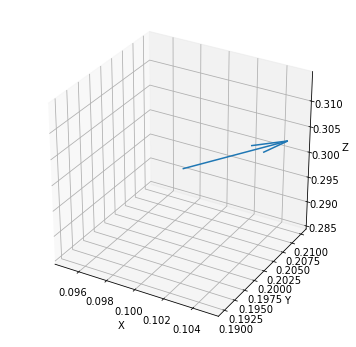

In [345]:
fig4 = plt.figure(figsize=(6, 6))
ax4 = fig4.gca(projection='3d')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')
ax4.quiver(xf, yf, zf, fxf, fyf, fzf,length = 0.01,normalize =True)
#ax4.view_init(90, 0)
plt.show()